In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [51]:
def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def scale_data(df):
    scaler = StandardScaler()
    df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    return df

In [52]:
##### Load the dataset into a pandas DataFrame
df = pd.read_csv('/home/davy/Documents/jupyter/bin/salaries.csv')  # Replace with your actual file path

# Display the first few rows of the dataset
print(df.head())

# Check the data types of each column
print(df.dtypes)

   work_year experience_level employment_type           job_title  salary  \
0       2025               SE              FT  Solutions Engineer  214000   
1       2025               SE              FT  Solutions Engineer  136000   
2       2025               MI              FT       Data Engineer  158800   
3       2025               MI              FT       Data Engineer  139200   
4       2025               EN              FT       Data Engineer   90000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         214000                 US           100   
1             USD         136000                 US           100   
2             USD         158800                 AU             0   
3             USD         139200                 AU             0   
4             USD          90000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               AU  

In [53]:
df.loc[(df["job_title"].str.contains("AI")) | (df["job_title"].str.contains("ML")), "job_title"].value_counts()[0:5]

job_title
AI Engineer       1620
AI Architect       251
AI Developer       198
MLOps Engineer     176
AI Scientist       110
Name: count, dtype: int64

In [54]:
df.loc[(df["job_title"].str.contains("AI")) | (df["job_title"].str.contains("ML")), ["job_title", "salary_in_usd"]].groupby("job_title").mean()

,salary_in_usd
job_title,
AI Architect,213443.450199
AI Content Writer,40506.666667
AI Data Engineer,94444.000000
AI Data Scientist,81004.000000
AI Developer,152523.277778
AI Engineer,173341.854938
AI Engineering Lead,23649.000000
AI Engineering Manager,179930.500000
AI Governance Lead,126582.000000


In [55]:
# 1. Define the filter condition
ai_ml_jobs_filter = (df["job_title"].str.contains("AI", case=False)) | \
                    (df["job_title"].str.contains("ML", case=False))

# 2. Apply the filter and then perform the grouped aggregations
# Select the relevant columns after filtering
filtered_df = df.loc[ai_ml_jobs_filter, ["job_title", "salary_in_usd"]]

# Group by 'job_title' and apply multiple aggregations using .agg()
combined_stats = filtered_df.groupby("job_title").agg(
    count=('job_title', 'count'),  # Count occurrences of each job_title
    average_salary=('salary_in_usd', 'mean') # Calculate mean of salary_in_usd
).sort_values(by='count', ascending=False) # Sort by count if desired, similar to value_counts default

print("Combined Job Counts and Average Salaries for AI/ML related jobs:")
print(combined_stats)

# If you specifically want the top 5 by count, you can slice the result:
print("\nTop 5 AI/ML related jobs by count with their average salary:")
print(combined_stats.head(5))

Combined Job Counts and Average Salaries for AI/ML related jobs:
                                  count  average_salary
job_title                                              
AI Engineer                        1620   173341.854938
AI Architect                        251   213443.450199
AI Developer                        198   152523.277778
MLOps Engineer                      176   163674.039773
AI Scientist                        110   175523.236364
AI Specialist                        96   140837.750000
AI Researcher                        90   179670.400000
Head of AI                           52   250161.596154
ML Scientist                         34   180332.588235
AI Lead                              31   187603.483871
AI Product Manager                   27   195172.222222
AI Product Owner                     22   128142.409091
ML Infrastructure Engineer           18   229300.000000
GenAI Architect                      12   203958.333333
AI Data Scientist                    11

In [56]:
df = df[df["job_title"] == "AI Engineer"]

In [57]:
CATEGORICAL_COLUMNS = ["experience_level", "employment_type", "company_location", "company_size"]

In [58]:
DROP_COLUMNS = ["salary_currency", "employee_residence", "job_title", "salary"]
df.drop(DROP_COLUMNS, axis = 1, inplace=True)

In [59]:
location_counts = df["company_location"].value_counts()
locations_to_keep = location_counts[location_counts >= 3].index
locations_to_keep

Index(['US', 'GB', 'CA', 'DE', 'LT', 'AT', 'ES', 'BR', 'MX', 'IN', 'NL', 'TR',
       'AU', 'PL', 'SK', 'CO', 'BE'],
      dtype='object', name='company_location')

In [60]:
df = df[df["company_location"].isin(locations_to_keep)]

In [61]:
df["company_location"] = df["company_location"].apply(lambda x: "US" if x == "US" else "OT")

In [62]:
df = pd.get_dummies(df, columns=CATEGORICAL_COLUMNS, drop_first=True)

In [63]:
# Find columns that are boolean
bool_cols = df.select_dtypes(include='bool').columns
# Convert them to int
df[bool_cols] = df[bool_cols].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 251 to 127286
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   work_year            1593 non-null   int64
 1   salary_in_usd        1593 non-null   int64
 2   remote_ratio         1593 non-null   int64
 3   experience_level_EX  1593 non-null   int64
 4   experience_level_MI  1593 non-null   int64
 5   experience_level_SE  1593 non-null   int64
 6   employment_type_FT   1593 non-null   int64
 7   employment_type_PT   1593 non-null   int64
 8   company_location_US  1593 non-null   int64
 9   company_size_M       1593 non-null   int64
 10  company_size_S       1593 non-null   int64
dtypes: int64(11)
memory usage: 149.3 KB


In [65]:
df.head(5)

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employment_type_PT,company_location_US,company_size_M,company_size_S
251,2025,200900,100,0,1,0,1,0,1,1,0
252,2025,133900,100,0,1,0,1,0,1,1,0
352,2025,190000,0,0,0,1,1,0,1,1,0
353,2025,145000,0,0,0,1,1,0,1,1,0
571,2025,223400,0,0,0,1,1,0,1,1,0


In [66]:
df.columns

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FT',
       'employment_type_PT', 'company_location_US', 'company_size_M',
       'company_size_S'],
      dtype='object')

In [67]:
X = df.drop(['salary_in_usd'], axis=1) # Drop original salary and the target itself
y = df['salary_in_usd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns in the training data
numerical_cols = X_train.select_dtypes(include=[np.number]).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training numerical data and transform it
X_train_scaled = X_train.copy() # Work on a copy to avoid SettingWithCopyWarning
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# --- 3. Scale the Test Data using the *FITTED* Scaler ---
# Do NOT refit the scaler here! Use transform()
X_test_scaled = X_test.copy() # Work on a copy
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols]) # Use transform!

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# You can also inspect the coefficients
# print("\nModel Coefficients:")
# for feature, coef in zip(X.columns, model.coef_):
#     print(f"{feature}: {coef:.2f}")


Mean Squared Error (MSE): 6533251295.23
R-squared (R2): 0.13


In [68]:
X_train_scaled.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employment_type_PT,company_location_US,company_size_M,company_size_S
122377,-1.084648,-0.521929,-0.195716,1.431030,-1.200255,0.084348,-0.039653,0.361158,0.112777,-0.068789
119454,-1.084648,-0.521929,-0.195716,-0.698797,0.833156,0.084348,-0.039653,0.361158,0.112777,-0.068789
43056,0.755354,-0.521929,-0.195716,-0.698797,0.833156,0.084348,-0.039653,0.361158,0.112777,-0.068789
26928,0.755354,-0.521929,-0.195716,1.431030,-1.200255,0.084348,-0.039653,0.361158,0.112777,-0.068789
105216,-1.084648,1.918208,-0.195716,-0.698797,0.833156,0.084348,-0.039653,0.361158,0.112777,-0.068789


In [76]:
y_train

122377    170200
119454    212000
43056     280600
26928     215000
105216    121400
           ...  
77351     150000
97749     220000
52017     100000
115068     96600
77022     132500
Name: salary_in_usd, Length: 1274, dtype: int64

In [77]:
A_train = X_train_scaled.copy()
A_train["salary_in_usd"] = y_train.values

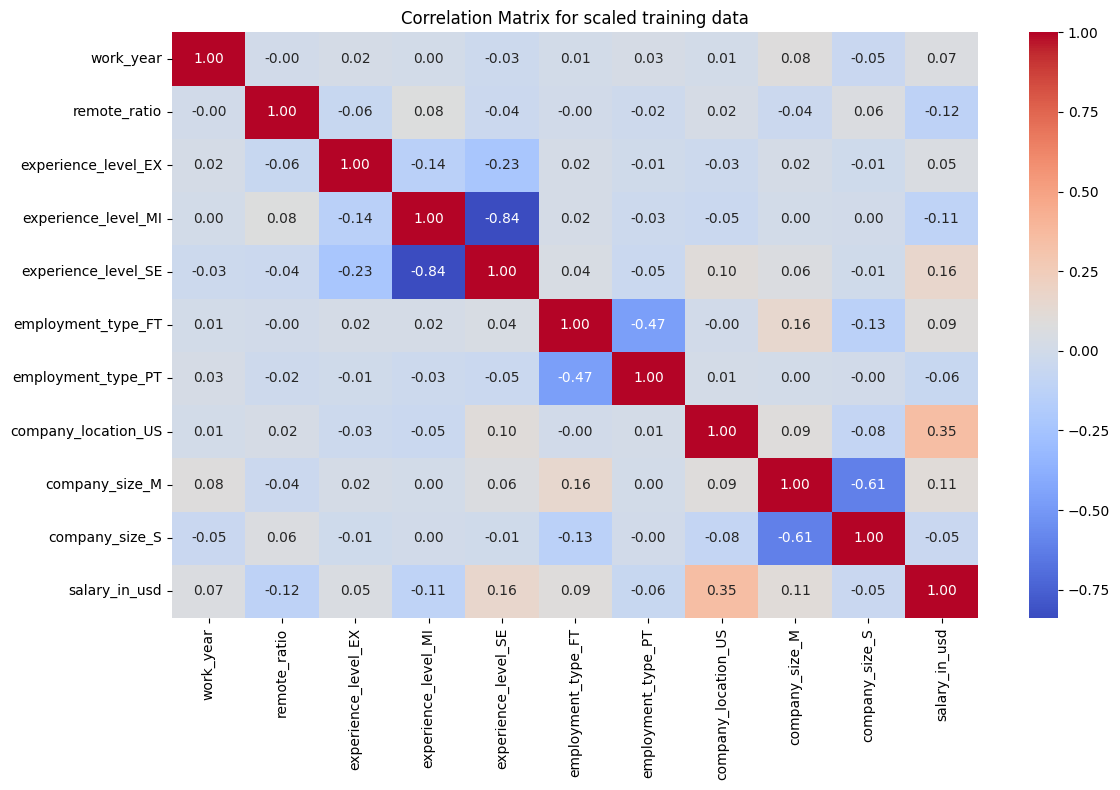

In [79]:
# Display the correlation matrix for X_train_scaled
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = A_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for scaled training data')
plt.tight_layout()
plt.show()

In [70]:
X_predict = X_test.iloc[0].to_frame().T

In [71]:
X_predict

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employment_type_PT,company_location_US,company_size_M,company_size_S
55927,2025,0,0,1,0,1,0,1,1,0


In [72]:
X_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 55927 to 55927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   work_year            1 non-null      int64
 1   remote_ratio         1 non-null      int64
 2   experience_level_EX  1 non-null      int64
 3   experience_level_MI  1 non-null      int64
 4   experience_level_SE  1 non-null      int64
 5   employment_type_FT   1 non-null      int64
 6   employment_type_PT   1 non-null      int64
 7   company_location_US  1 non-null      int64
 8   company_size_M       1 non-null      int64
 9   company_size_S       1 non-null      int64
dtypes: int64(10)
memory usage: 88.0 bytes


In [73]:
y_test.iloc[0]

np.int64(108600)

In [74]:
# --- How to make predictions on NEW, UNSCALED INPUT (e.g., from a user or new data source) ---

# Example of a new, unscaled input (let's say a single record)
# Make sure its columns match the original X columns before one-hot encoding
"""new_unscaled_data = pd.DataFrame({
    'feature1': [85.0],
    'feature2': [7.5],
    'categorical_col_B': [1], # If 'B' was the category, and 'A' was dropped (drop_first=True)
    'categorical_col_C': [0]
})"""

# IMPORTANT: Ensure the columns of new_unscaled_data exactly match the columns of X_train_scaled
# after encoding and before scaling. You might need to re-apply your encoding strategy here
# or create a dummy DataFrame with all possible encoded columns and fill it.
# For simplicity in this example, I'm assuming it already has the one-hot encoded columns.
# In a real application, you'd apply the same one-hot encoding transformation used for X_train.

"""print("\nNew unscaled data for prediction:")
print(new_unscaled_data)"""

# 1. Identify numerical columns in the new data
numerical_cols_new = X_predict.select_dtypes(include=[np.number]).columns

# 2. Scale the numerical features of the new input using the *ALREADY FITTED* scaler
new_scaled_data = X_predict.copy()
new_scaled_data[numerical_cols_new] = scaler.transform(X_predict[numerical_cols_new])

print("\nNew scaled data for prediction:")
print(new_scaled_data)

# 3. Make the prediction with the model
final_prediction = model.predict(new_scaled_data)

print(f"\nPrediction for new unscaled input: {final_prediction[0]:.2f}")


New scaled data for prediction:
       work_year  remote_ratio  experience_level_EX  experience_level_MI  \
55927   0.755354     -0.521929            -0.195716              1.43103   

       experience_level_SE  employment_type_FT  employment_type_PT  \
55927            -1.200255            0.084348           -0.039653   

       company_location_US  company_size_M  company_size_S  
55927             0.361158        0.112777       -0.068789  

Prediction for new unscaled input: 184279.96
